# Notebook to debug functions

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import os

2022-05-27 23:42:34.690304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-27 23:42:34.690344: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
images = os.listdir(r"/mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/0/left")
print(images[0:10])

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg']


In [3]:
leftWrong = tf.keras.utils.image_dataset_from_directory(
  r"/mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/0/left",
  labels=None,
  color_mode="grayscale",
  batch_size=None,
  image_size=(224, 224),
  shuffle=False)

Found 11946 files belonging to 1 classes.


2022-05-27 23:43:55.617623: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-27 23:43:55.617669: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-27 23:43:55.617686: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Nicolas-Windows): /proc/driver/nvidia/version does not exist
2022-05-27 23:43:55.618105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
rightWrong = tf.keras.utils.image_dataset_from_directory(
  r"/mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/0/right",
  labels=None,
  color_mode="grayscale",
  batch_size=None,
  image_size=(224, 224),
  shuffle=False)

Found 11946 files belonging to 1 classes.


In [5]:
wrong = tf.data.Dataset.zip((leftWrong, rightWrong))
wrong

<ZipDataset element_spec=(TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None))>

In [6]:
leftPair = tf.keras.utils.image_dataset_from_directory(
  r"/mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/1/left",
  labels=None,
  color_mode="grayscale",
  batch_size=None,
  image_size=(224, 224),
  shuffle=False)

rightPair = tf.keras.utils.image_dataset_from_directory(
  r"/mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/1/right",
  labels=None,
  color_mode="grayscale",
  batch_size=None,
  image_size=(224, 224),
  shuffle=False)

pair = tf.data.Dataset.zip((leftPair, rightPair))
pair

Found 11946 files belonging to 1 classes.
Found 11946 files belonging to 1 classes.


<ZipDataset element_spec=(TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None))>

In [7]:
dataset = pair.concatenate(wrong)
dataset

<ConcatenateDataset element_spec=(TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None))>

Preview images

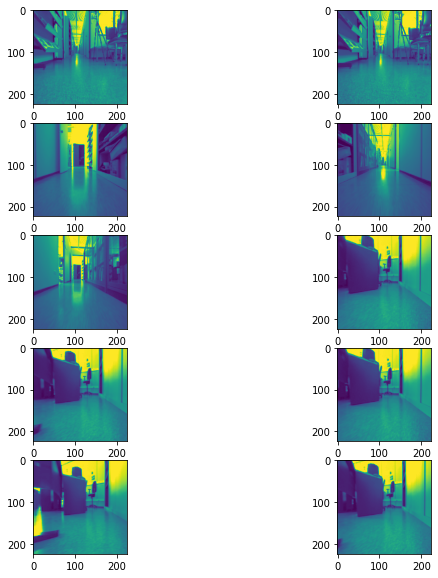

In [101]:
plt.figure(figsize=(10, 10))
for l, r in dataset.take(1):
  for i in range(10):
    ax = plt.subplot(5, 2, i + 1)
    plt.imshow(r[i].numpy().astype("uint8"))

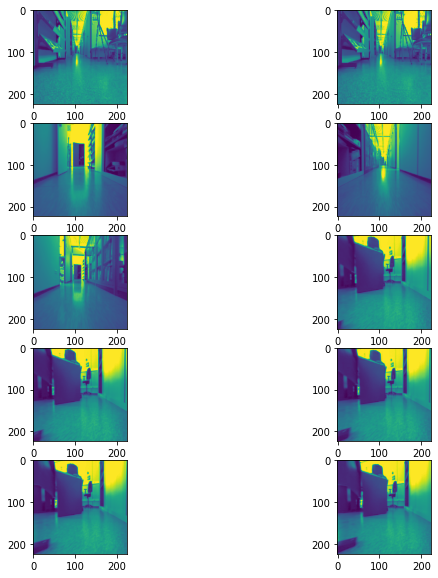

In [94]:
plt.figure(figsize=(10, 10))
for l, r in dataset.take(1):
  for i in range(10):
    ax = plt.subplot(5, 2, i + 1)
    plt.imshow(l[i].numpy().astype("uint8"))